In [1]:
import pandas as pd

df = pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [2]:
df.shape

(174, 6)

In [4]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_coding_daily  174 non-null    float64
 1   preferred_language  174 non-null    object 
 2   typing_speed        174 non-null    int64  
 3   import_usage        174 non-null    object 
 4   oop_usage           174 non-null    object 
 5   level               174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [6]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [7]:
df["preferred_language"].value_counts()

preferred_language
Python    60
C++       59
Java      55
Name: count, dtype: int64

In [8]:
df["import_usage"].value_counts()

import_usage
Yes    92
No     82
Name: count, dtype: int64

In [9]:
df["oop_usage"].value_counts()

oop_usage
No     93
Yes    81
Name: count, dtype: int64

In [10]:
df["level"].value_counts()

level
Advanced        64
Beginner        59
Intermediate    51
Name: count, dtype: int64

In [11]:
df.sample(5, random_state=42)

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
155,4.5,Python,59,Yes,Yes,Intermediate
144,5.0,Python,58,Yes,Yes,Intermediate
101,1.5,C++,20,No,No,Beginner
127,3.0,C++,33,Yes,No,Intermediate
140,3.5,Java,32,Yes,No,Intermediate


In [12]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [13]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


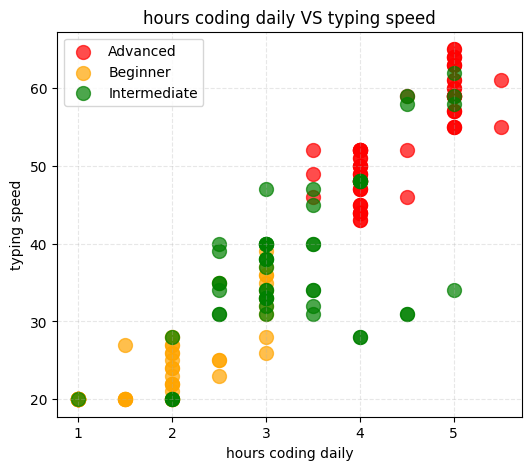

In [14]:
import matplotlib.pyplot as plt

advanced = df[df["level"]=="Advanced"]
beginner = df[df["level"]=="Beginner"]
intermediate = df[df["level"]=="Intermediate"]

plt.figure(figsize=(6,5))

plt.scatter(advanced["hours_coding_daily"], advanced["typing_speed"], s=100, alpha=0.7, color="red", label="Advanced")
plt.scatter(beginner["hours_coding_daily"], beginner["typing_speed"], s=100, alpha=0.7, color="orange", label="Beginner")
plt.scatter(intermediate["hours_coding_daily"], intermediate["typing_speed"], s=100, alpha=0.7, color="green", label="Intermediate")

plt.xlabel("hours coding daily")
plt.ylabel("typing speed")
plt.title("hours coding daily VS typing speed")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hours_coding_daily", "preferred_language", "typing_speed", "import_usage", "oop_usage"]]
y = df["level"]

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

num_columns = ["hours_coding_daily", "typing_speed"]
cat_columns = ["preferred_language", "import_usage", "oop_usage"]

preprocessing = ColumnTransformer(
    transformers = [
        ("scaler", StandardScaler(), num_columns),
        ("ohe", OneHotEncoder(), cat_columns)
    ]
)

model = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("model", RandomForestClassifier(random_state=42))
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

print("Akurasi per fold :", scores)
print("rata-rata akurasi :", scores.mean())

Akurasi : 0.8857142857142857

Classification Report :
               precision    recall  f1-score   support

    Advanced       0.94      0.94      0.94        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.80      0.80      0.80        10

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35


Confusion Matrix :
 [[16  0  1]
 [ 0  7  1]
 [ 1  1  8]]
Akurasi per fold : [0.78571429 0.89285714 0.82142857 0.89285714 0.88888889]
rata-rata akurasi : 0.8563492063492063


In [18]:
data_baru = pd.DataFrame([[5, "Python", 50, "No", "Yes"]],
                        columns=["hours_coding_daily", "preferred_language", "typing_speed", "import_usage", "oop_usage"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

model memprediksi Advanced dengan tingkat keyakinan 96.67%


In [20]:
import joblib 

joblib.dump(model, "model_klasifikasi_level_coding_siswa.joblib")

['model_klasifikasi_level_coding_siswa.joblib']